# Business Analsytics R Challange 1

### Kunyang Que, Pengfei Ren, Valeriya Gorelova, Zhuoyang Wu

## Part I: Load Data via Github

In [1]:
url<-"https://raw.githubusercontent.com/jcbonilla/BusinessAnalytics/master/BAData/zagat.CSV"
data<-read.csv(url, header=TRUE,stringsAsFactors=FALSE)
head(data)

,Name,Food,Decor,Service,Price
,<chr>,<int>,<int>,<int>,<int>
1,107 West,16,13,16,26
2,2nd Street cafe,14,13,15,21
3,44 & Hell's kitchen,22,19,19,42
4,55 wall,21,22,21,54
5,55 wall street,21,22,21,54
6,92,15,15,15,43


By using the head(), we are displaying first 6 rows of the dataset.

## Part II: Compute summary statistics for price, décor, service, and food

In [2]:
summary(data$Price)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8.00   25.00   35.00   36.55   47.00   80.00 

In [3]:
summary(data$Decor)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.00   13.00   16.00   15.72   19.00   27.00 

In [4]:
summary(data$Service)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    8.0    14.0    16.0    16.9    20.0    26.0 

In [5]:
summary(data$Food)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   9.00   16.00   19.00   19.39   22.00   28.00 

We use summary() to calculate statistics for the four factors in the dataset.

## Part III: Segmentation of restaurants

* We believe that to judge the quality of a restaurant, **the food and the price** are the first factors to consider, and then **the service and the decoration**. Therefore, we assume that the computation of the score follows **0.4 * food + 0.3 * price + 0.2 * service + 0.1 * decor**.

### 3.1 Calculate the score

In [6]:
score<-0.4*data$Price+0.3*data$Food+0.2*data$Service+0.1*data$Decor
head(score)

[1] 19.7 16.9 29.1 34.3 34.3 26.2

Compute summary statistics for the score

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  11.90   19.65   24.30   25.39   30.70   47.50 

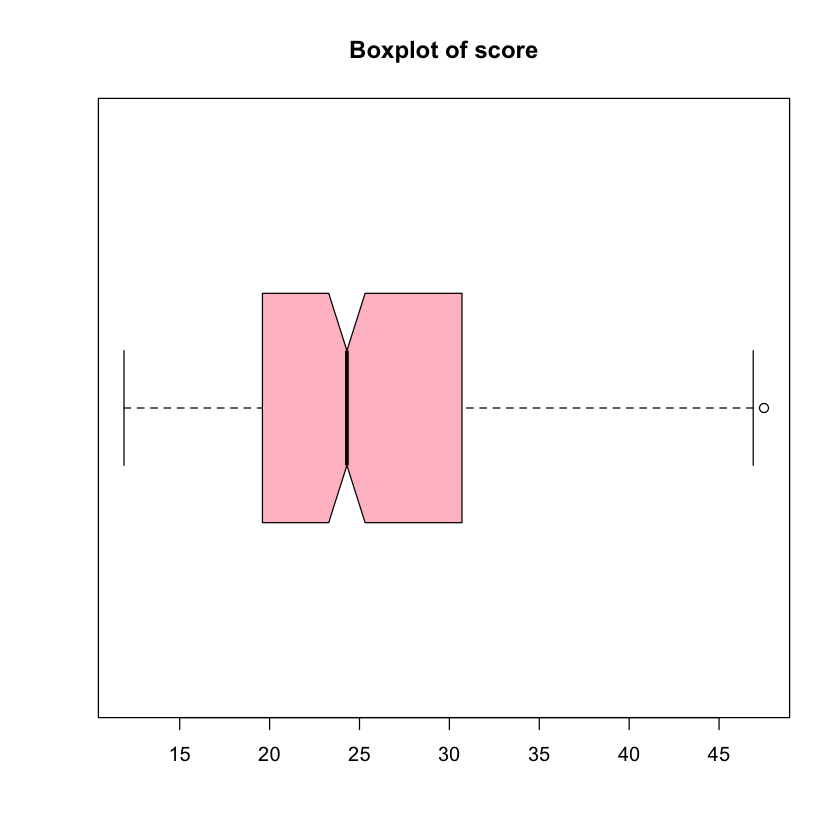

In [7]:
summary(score)
boxplot(score,main="Boxplot of score",names=c("score"),col=c("pink"),horizontal=TRUE,notch=TRUE)

### 3.2 Add the score column to the original dataset

In [8]:
frame<-data.frame(data,score)
head(frame)

,Name,Food,Decor,Service,Price,score
,<chr>,<int>,<int>,<int>,<int>,<dbl>
1,107 West,16,13,16,26,19.7
2,2nd Street cafe,14,13,15,21,16.9
3,44 & Hell's kitchen,22,19,19,42,29.1
4,55 wall,21,22,21,54,34.3
5,55 wall street,21,22,21,54,34.3
6,92,15,15,15,43,26.2


Combine the score we calculated above to the original dataset.

### 3.3 Compute the mean value of the Score

In [9]:
m<-mean(score)
m

[1] 25.38767

### 3.4 Segmentation

#### Restaurants that have scores above average

In [10]:
above=subset(frame,frame$score>m)
head(above$Name)

[1] "44 & Hell's kitchen" "55 wall"             "55 wall street"     
[4] "92"                  "Avra estiatorio"     "AZ"

#### Restaurants that have scores below average

In [11]:
below=subset(frame,frame$score<m)
head(below$Name)

[1] "107 West"         "2nd Street cafe"  "Angelica kitchen" "Angelo's"        
[5] "Avenue"           "Bali Nusa Indah"

Count the number of restaurants that are **above** average score

In [12]:
num.above=length(above$Name)
paste("Restaurants that have scores above average: ", num.above)

[1] "Restaurants that have scores above average:  132"

Count the number of restaurants that are **below** average score

In [13]:
num.below=length(below$Name)
paste("Restaurants that have scores below average: ", num.below)

[1] "Restaurants that have scores below average:  168"

* We could see that there are **132** restaurants that have scores above the average score value and **168** restaurants that have scores below the average score value.

Here are the **top 5** restaurants by score

In [14]:
above[order(above$score, decreasing=T), ][1:5,]

,Name,Food,Decor,Service,Price,score
,<chr>,<int>,<int>,<int>,<int>,<dbl>
272,Veritas,27,22,26,80,47.5
103,Four Season,26,27,26,78,46.9
205,Nobu,28,23,24,74,45.1
212,Oceana,27,25,26,72,44.6
213,Oceana,27,25,26,72,44.6


Here are the **last 5** restaurants by score

In [15]:
below[order(below$score), ][1:5,]

,Name,Food,Decor,Service,Price,score
,<chr>,<int>,<int>,<int>,<int>,<dbl>
29,Bo-ky,17,4,8,12,11.9
65,do jo,14,7,11,14,12.7
281,vinnie's pizza,20,3,13,10,12.9
119,Go Sushi,14,7,11,16,13.5
92,Ess a bajel,23,5,13,9,13.6


## Part IV: Compute and compare the summary statistics for 2 segments

We believe that the best way to visiualize the summary statistics is using **boxplots**.

### Food

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  11.00   20.00   22.00   21.63   23.25   28.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   9.00   15.00   18.00   17.62   19.25   25.00 

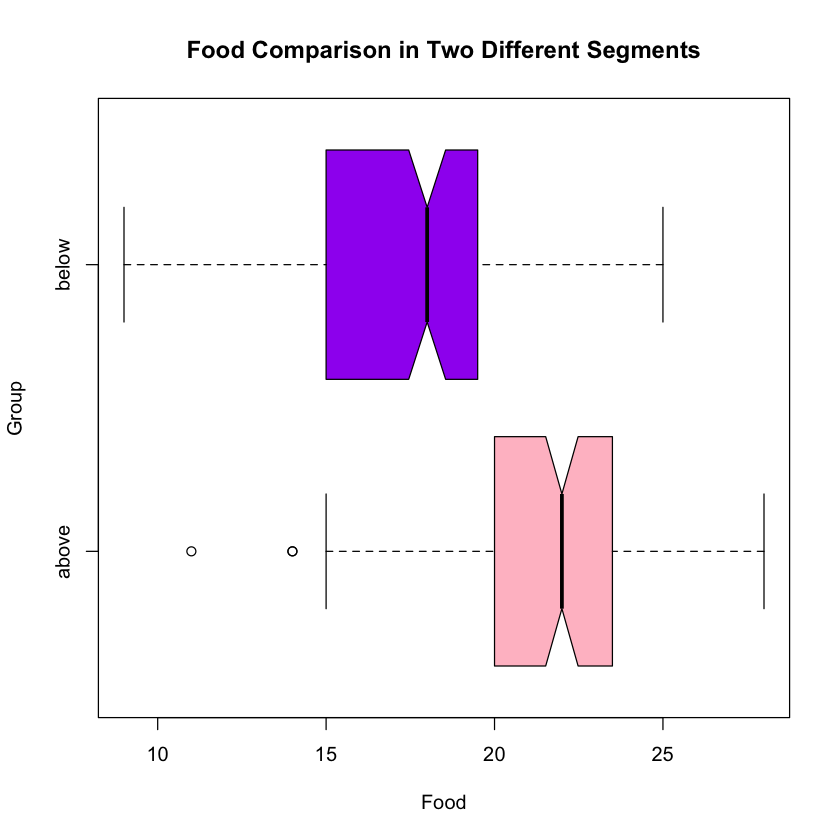

In [16]:
summary(above$Food)
summary(below$Food)
boxplot(above$Food,below$Food,main="Food Comparison in Two Different Segments",names=c("above","below"),col=c("pink", "purple"),
        horizontal=TRUE,notch=TRUE,xlab="Food",ylab="Group")

* As we can see from the boxplot, the majority of the restaurants are near average or below in food category.

### Decor

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8.00   17.00   19.00   19.33   22.00   27.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.00   10.00   13.00   12.89   15.25   22.00 

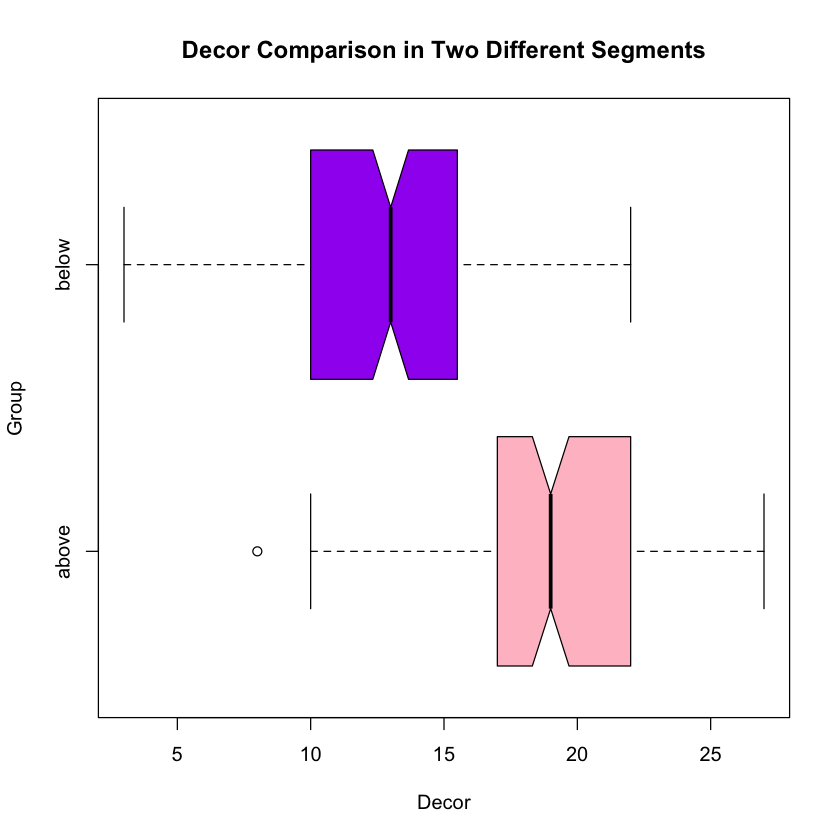

In [17]:
summary(above$Decor)
summary(below$Decor)
boxplot(above$Decor,below$Decor,main="Decor Comparison in Two Different Segments",names=c("above","below"),col=c("pink", "purple"),
        horizontal=TRUE,notch=TRUE,xlab="Decor",ylab="Group")

* As we can see from the boxplot, the majority of the restaurants are near average in decor category.

### Service

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13.00   18.00   20.00   19.87   21.00   26.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8.00   13.00   14.50   14.56   16.00   22.00 

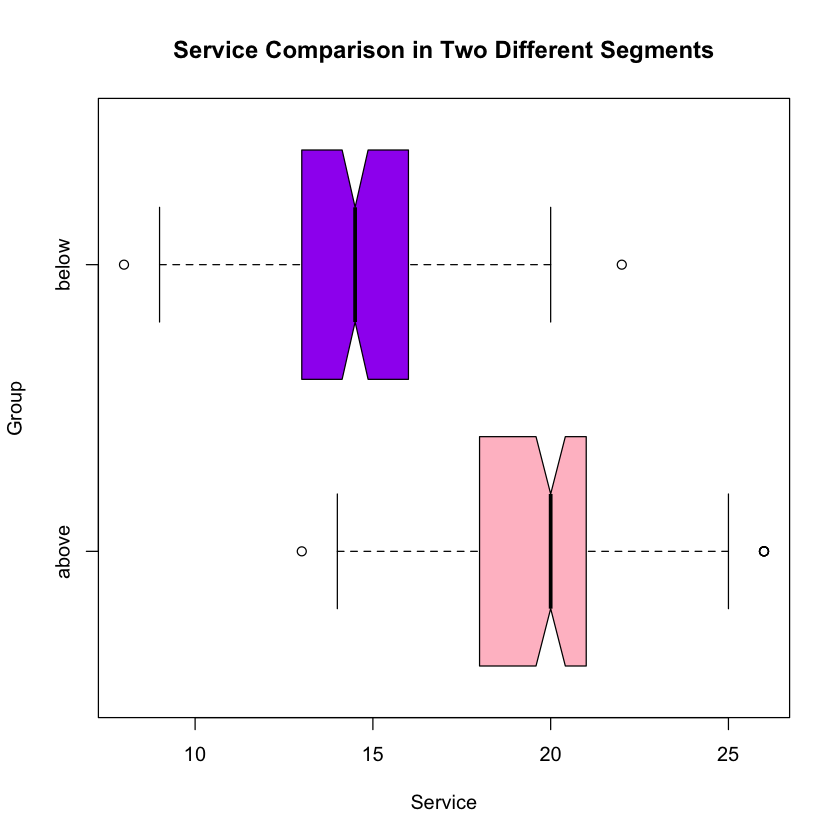

In [18]:
summary(above$Service)
summary(below$Service)
boxplot(above$Service,below$Service,main="Service Comparison in Two Different Segments",names=c("above","below"),col=c("pink","purple"),
        horizontal=TRUE,notch=TRUE,xlab="Service",ylab="Group")

*  A majority of restaurants that outperform the average score have below-median service score. 

### Price

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  32.00   42.00   49.00   50.23   56.25   80.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8.00   20.75   27.00   25.80   32.00   39.00 

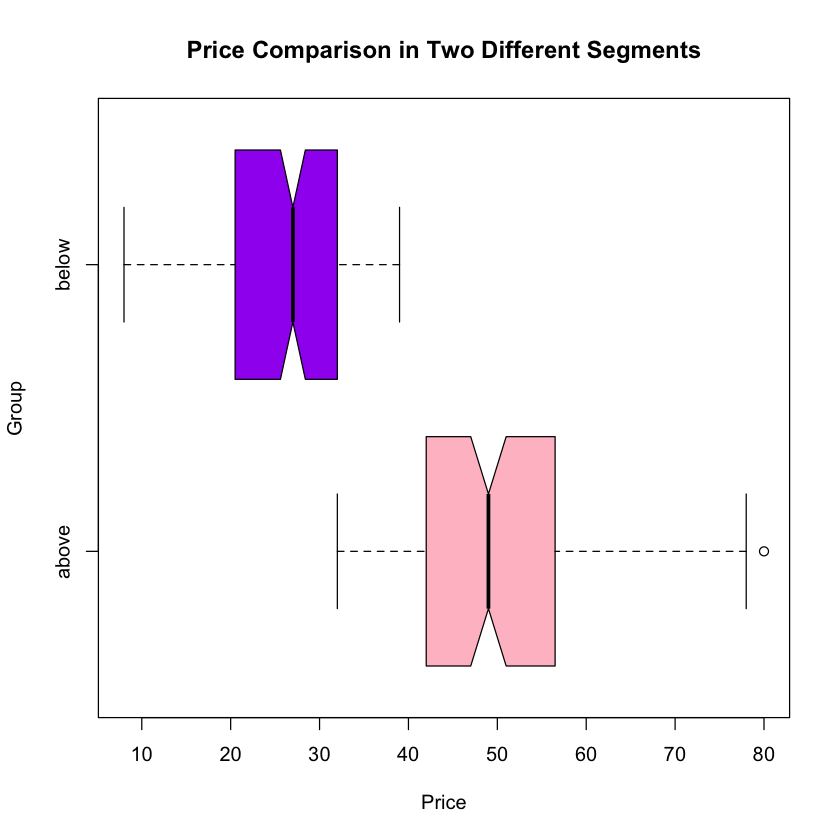

In [19]:
summary(above$Price)
summary(below$Price)
boxplot(above$Price,below$Price,main="Price Comparison in Two Different Segments", names=c("above","below"),col=c("pink", "purple"),
        horizontal=TRUE,notch=TRUE,xlab="Price",ylab="Group")

* A majority of restaurants that outperform the average score have below-median Price score.

## Extended Part: Scatterplot Matrix 

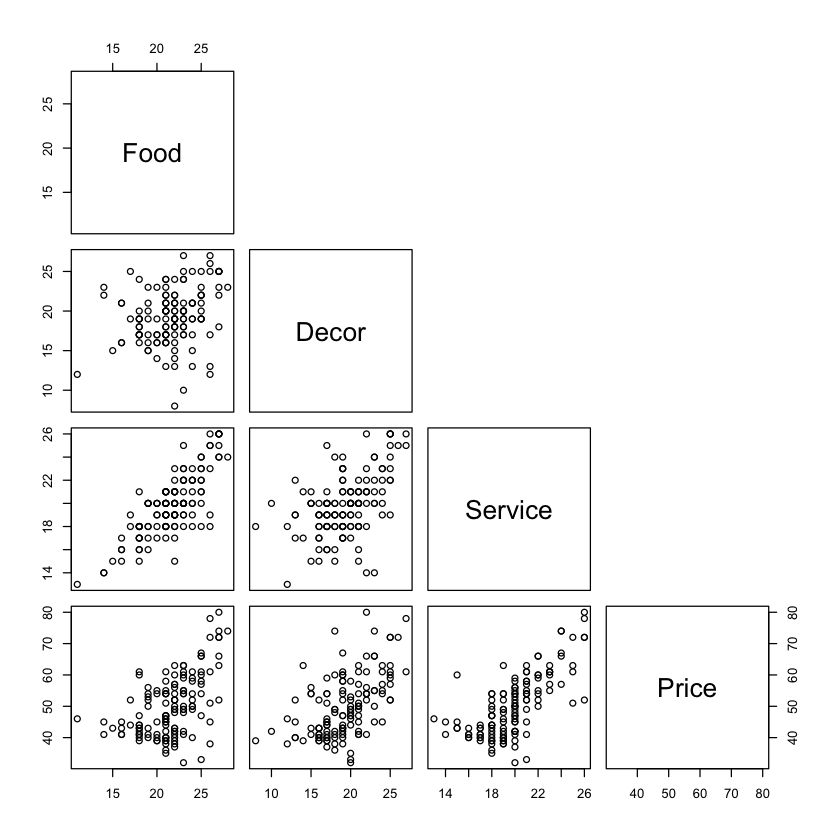

In [20]:
pairs(above[,2:5], upper.panel=NULL)

* For the graph above that shows restaurants which have scores above the average, we could see that all four varibles are positively correlated.
* The **service** and the **price** appears to have the strongest relationship.

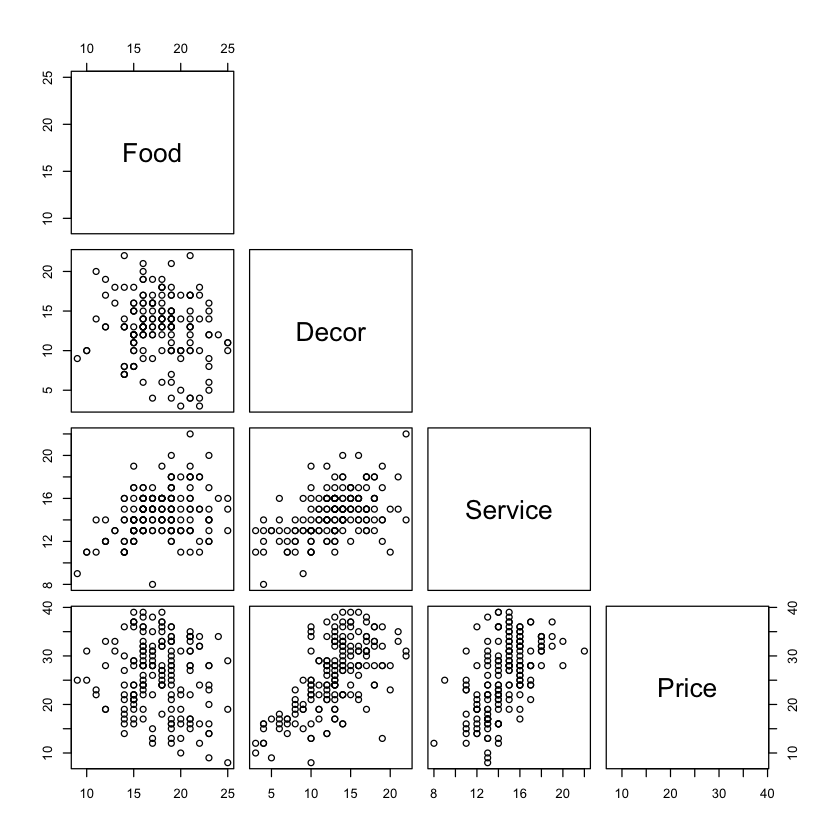

In [21]:
pairs(below[,2:5], upper.panel=NULL)

* For the restaurants that have scores below the average, the **decor** and the **price** appears to have the strongest relationship.

#### According to the graph and our computation formula,   the restaurants that have scores above average should offer higher quality service to customers while raising the price. For the restaurants that have scores below average, we suggest that while raising the price, restaurants should improve the decoration to attract more customers.